---

# 주성분 분석

> 서로 연관되어 있는 변수들이 관측되었을때, 이 변수들이 전체적으로 가지고 있는 정보를 최대한 확보하는 적은수의 새로운 변수를 생성하는 방법.<br>
> 차원을 줄이는 방법으로 성능 향상과 컬름들의 결합에 목적이 있음.

- 새로운 컬럼을 만드는것

##### EX1) pasta

In [1]:
data <- read.table("Rdata/pasta.txt")
head(data)

,noodle,dishes,sauce
pesto_alla_Genovese,2,4,5
Marinara,1,5,1
Puttanesca,5,3,4
Primavera,2,2,3
Vongole,3,5,5
Boscaiola,4,3,2


## 다중 공선성 확인
> 너무 상관이 높아서 마치 쌍둥이인 데이터 찾기

In [2]:
cor(data)

,noodle,dishes,sauce
noodle,1.0000000,0.1905002,0.3600411
dishes,0.1905002,1.0000000,0.3004804
sauce,0.3600411,0.3004804,1.0000000


## 표준화
> 평균을 0으로 표준편차는 1로 변경해서 데이터를 새로 구성하는것!
- 각각의 표준편차 위치가 다르게 있으니까 하나로 모아서 비교하겠다

In [3]:
data1 <- scale(data)
data1
summary(data1)
head(data1)

,noodle,dishes,sauce
pesto_alla_Genovese,-0.6708204,0.3407771,1.44913767
Marinara,-1.3416408,1.1927199,-1.31112456
Puttanesca,1.3416408,-0.5111657,0.75907212
Primavera,-0.6708204,-1.3631084,0.06900656
Vongole,0.0000000,1.1927199,1.44913767
Boscaiola,0.6708204,-0.5111657,-0.62105900
Ragu,0.6708204,0.3407771,0.06900656
Alfredo,-1.3416408,-1.3631084,-1.31112456
Bechamel,0.0000000,-0.5111657,-0.62105900
Carbonara,1.3416408,1.1927199,0.06900656


     noodle            dishes             sauce         
 Min.   :-1.3416   Min.   :-1.36311   Min.   :-1.31112  
 1st Qu.:-0.6708   1st Qu.:-0.51117   1st Qu.:-0.62106  
 Median : 0.0000   Median :-0.08519   Median : 0.06901  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.6708   3rd Qu.: 0.97973   3rd Qu.: 0.58656  
 Max.   : 1.3416   Max.   : 1.19272   Max.   : 1.44914  

,noodle,dishes,sauce
pesto_alla_Genovese,-0.6708204,0.3407771,1.44913767
Marinara,-1.3416408,1.1927199,-1.31112456
Puttanesca,1.3416408,-0.5111657,0.75907212
Primavera,-0.6708204,-1.3631084,0.06900656
Vongole,0.0000000,1.1927199,1.44913767
Boscaiola,0.6708204,-0.5111657,-0.62105900


In [4]:
summary(data)

     noodle      dishes         sauce     
 Min.   :1   Min.   :2.00   Min.   :1.00  
 1st Qu.:2   1st Qu.:3.00   1st Qu.:2.00  
 Median :3   Median :3.50   Median :3.00  
 Mean   :3   Mean   :3.60   Mean   :2.90  
 3rd Qu.:4   3rd Qu.:4.75   3rd Qu.:3.75  
 Max.   :5   Max.   :5.00   Max.   :5.00  

In [5]:
sd(data1[,3])

[1] 1

In [6]:
#apply 꼮 알아야함!
apply(data1, 2, sd)

noodle dishes  sauce 
     1      1      1

### 주성분 분석
- prcomp()

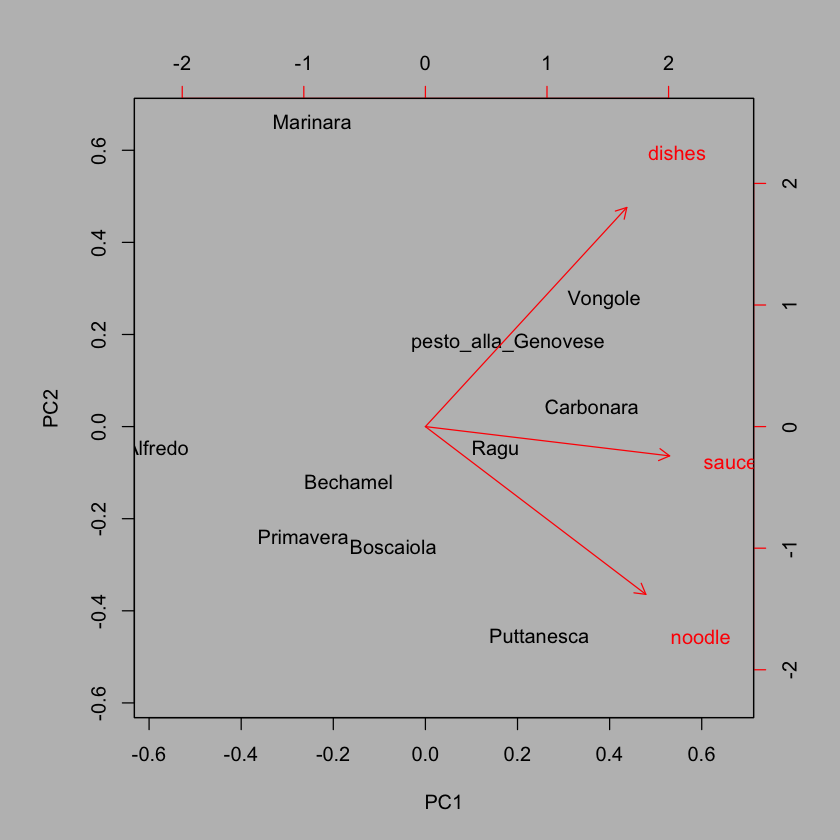

In [7]:
par(bg = "gray")
p1 <- prcomp(data, scale. = T)
biplot(p1)

### EX 2) 라면

In [8]:
ra <- read.table("Rdata/라면.txt", header = T )
head(ra)
class(ra)

X,면발,포장재,국물
신라면,2,4,5
짜파게티,5,2,1
쌀사리곰탕면,3,4,3
무파마,3,3,5
안성탕면,1,2,3
오징어짬뽕,1,3,4


[1] "data.frame"

In [9]:
rownames(ra) <- ra[,1]
ra

,X,면발,포장재,국물
신라면,신라면,2,4,5
짜파게티,짜파게티,5,2,1
쌀사리곰탕면,쌀사리곰탕면,3,4,3
무파마,무파마,3,3,5
안성탕면,안성탕면,1,2,3
오징어짬뽕,오징어짬뽕,1,3,4
너구리,너구리,3,3,4
육계장,육계장,2,3,5


In [10]:
ra <- ra[, -1]
ra

,면발,포장재,국물
신라면,2,4,5
짜파게티,5,2,1
쌀사리곰탕면,3,4,3
무파마,3,3,5
안성탕면,1,2,3
오징어짬뽕,1,3,4
너구리,3,3,4
육계장,2,3,5


In [25]:
cor(ra)
ra2 <- scale(ra)
ra2

,면발,포장재,국물
면발,1.0000000,-0.1443376,-0.5499719
포장재,-0.1443376,1.0000000,0.5443311
국물,-0.5499719,0.5443311,1.0000000


,면발,포장재,국물
신라면,-0.3818813,1.322876,0.9001029
짜파게티,1.9094065,-1.322876,-1.9802263
쌀사리곰탕면,0.3818813,1.322876,-0.5400617
무파마,0.3818813,0.000000,0.9001029
안성탕면,-1.1456439,-1.322876,-0.5400617
오징어짬뽕,-1.1456439,0.000000,0.1800206
너구리,0.3818813,0.000000,0.1800206
육계장,-0.3818813,0.000000,0.9001029


In [12]:
summary(ra2)
head(ra2)

      면발             포장재             국물        
 Min.   :-1.1456   Min.   :-1.3229   Min.   :-1.9802  
 1st Qu.:-0.5728   1st Qu.:-0.3307   1st Qu.:-0.5401  
 Median : 0.0000   Median : 0.0000   Median : 0.1800  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.3819   3rd Qu.: 0.3307   3rd Qu.: 0.9001  
 Max.   : 1.9094   Max.   : 1.3229   Max.   : 0.9001  

,면발,포장재,국물
신라면,-0.3818813,1.322876,0.9001029
짜파게티,1.9094065,-1.322876,-1.9802263
쌀사리곰탕면,0.3818813,1.322876,-0.5400617
무파마,0.3818813,0.000000,0.9001029
안성탕면,-1.1456439,-1.322876,-0.5400617
오징어짬뽕,-1.1456439,0.000000,0.1800206


In [13]:
apply(ra2,2,sd)

면발 포장재   국물 
     1      1      1

In [14]:
ra3 <- prcomp(ra2, scale. = T)
ra3

Standard deviations (1, .., p=3):
[1] 1.3598983 0.9250247 0.5431446

Rotation (n x k) = (3 x 3):
              PC1          PC2        PC3
면발    0.5246079 -0.703176912  0.4799258
포장재 -0.5207846 -0.711011926 -0.4724885
국물   -0.6734760  0.002066804  0.7392062

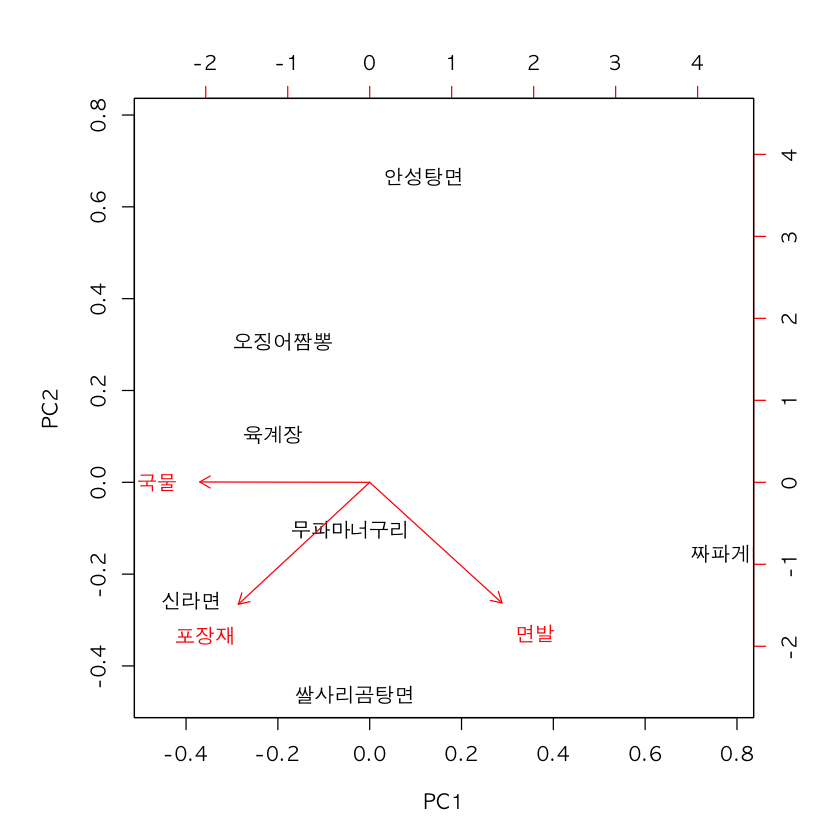

In [15]:
options(warn = -1)
par(family = "AppleGothic")
biplot(ra3)

---
# USArrests
- 1973년 미국 50개주에서 각각 10만명당 폭행, 살인, 강간으로 체포된 통계 데이터
- 또한 도시 지역에 살고있는 인구의 비율도 주어진다.

In [16]:
head(USArrests)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


- Murder : 살인
- Assault : 폭행
- UrbanPop : 도시 인구밀도
- Rape : 강간

### 데이터 상관 관계

In [17]:
cor(USArrests)

,Murder,Assault,UrbanPop,Rape
Murder,1.00000000,0.8018733,0.06957262,0.5635788
Assault,0.80187331,1.0000000,0.25887170,0.6652412
UrbanPop,0.06957262,0.2588717,1.00000000,0.4113412
Rape,0.56357883,0.6652412,0.41134124,1.0000000


### 주성분 분석

In [18]:
result <- princomp(USArrests, cor = T)
summary(result)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4
Standard deviation     1.5748783 0.9948694 0.5971291 0.41644938
Proportion of Variance 0.6200604 0.2474413 0.0891408 0.04335752
Cumulative Proportion  0.6200604 0.8675017 0.9566425 1.00000000

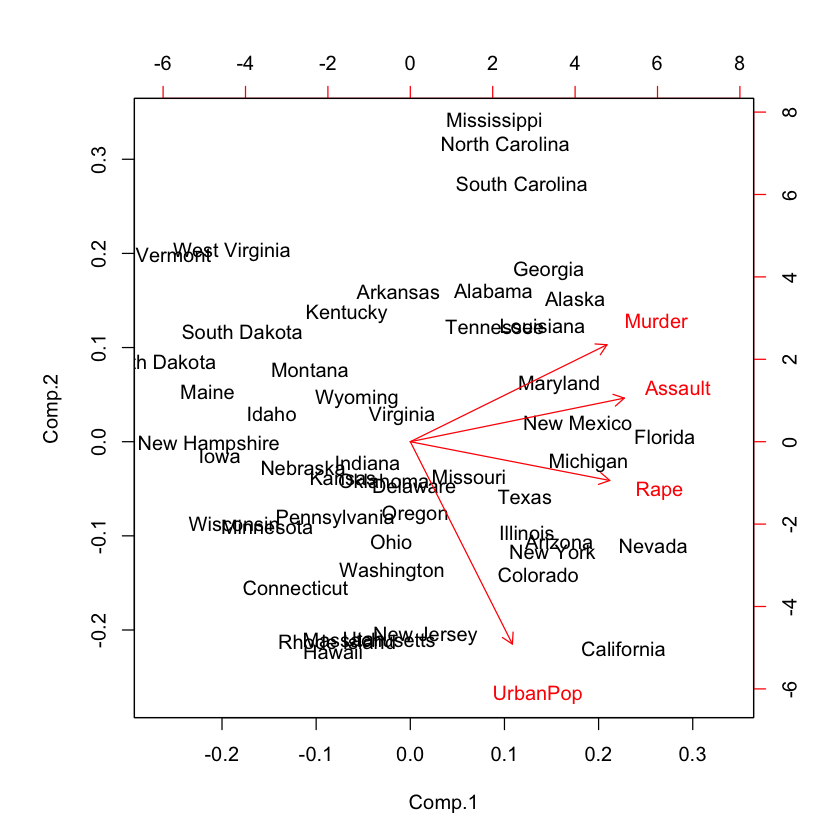

In [19]:
biplot(result)

In [20]:
result$loadings


Loadings:
         Comp.1 Comp.2 Comp.3 Comp.4
Murder    0.536  0.418  0.341  0.649
Assault   0.583  0.188  0.268 -0.743
UrbanPop  0.278 -0.873  0.378  0.134
Rape      0.543 -0.167 -0.818       

               Comp.1 Comp.2 Comp.3 Comp.4
SS loadings      1.00   1.00   1.00   1.00
Proportion Var   0.25   0.25   0.25   0.25
Cumulative Var   0.25   0.50   0.75   1.00

- 함수식이 만들어진다.
- 1주성분 = 0.536 * Murder + 0.583 * Assault +... ## comp1으로만 계산.

In [21]:
# 1주성분으로 새로운 변수값 생성
score <-  0.536 * USArrests$Murder + 0.583 * USArrests$Assault + 0.278 * USArrests$UrbanPop+ 0.543 * USArrests$Rape
score

[1] 172.2988 196.1965 214.8166 139.9753 213.0758 165.8645  93.3321 170.5118
 [9] 243.1211 163.0288  63.7014  94.0762 186.8474  99.2112  55.8091  98.3830
[17]  92.0531 183.8240  67.9280 214.6782 121.7063 194.7819  69.8619 181.1439
[25] 143.3706  90.4022  87.9663 200.9512  55.0831 131.6138 209.1557 192.1119
[33] 224.6913  42.8597 106.3430 121.3346 129.8593  93.2815 131.9573 195.9369
[41]  71.6352 147.6879 160.0767 106.3499  44.1408 124.2581 121.1996  66.1701
[49]  56.5050 122.6586

In [22]:
Result <- data.frame(States = rownames(USArrests), Score=score)
head(Result)

States,Score
Alabama,172.2988
Alaska,196.1965
Arizona,214.8166
Arkansas,139.9753
California,213.0758
Colorado,165.8645


In [23]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [24]:
head(arrange(Result,desc(Score)),10)

States,Score
Florida,243.1211
North Carolina,224.6913
Arizona,214.8166
Maryland,214.6782
California,213.0758
New Mexico,209.1557
Nevada,200.9512
Alaska,196.1965
South Carolina,195.9369
Michigan,194.7819
